<a href="https://colab.research.google.com/github/jaehyun0220/Colab/blob/master/AI_3_More_Engineering(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load packages
 
import sys #access to system parameters 
print("Python version: {}". format(sys.version))
 
import pandas as pd
print("pandas version: {}". format(pd.__version__))
 
import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
 
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
 
import os

Python version: 3.5.4 |Anaconda custom (64-bit)| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
scikit-learn version: 0.20.0
NumPy version: 1.14.2


In [ ]:
#Load Data Modelling Libraries
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# File Read from CSV
TITANIC_PATH = os.getcwd()

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

#데이터 load
train_data = load_titanic_data("train.csv")
print(train_data.shape)
test_data = load_titanic_data("test.csv")
print(test_data.shape)

(891, 12)
(418, 11)


In [ ]:
#preview train data
print (train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#preview test data
print (test_data.info())
test_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,NaN,C
137,1029,2,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0000,NaN,S
295,1187,3,"Angheloff, Mr. Minko",male,26.0,0,0,349202,7.8958,NaN,S


In [ ]:
#however passing by reference is convenient, because we can clean both datasets at once
tot_data = [train_data, test_data]
print("Shape of tot_datset is: ", np.shape(tot_data))

print(type(tot_data), type(tot_data[0]), type(tot_data[1]))

for idx, dataset in enumerate(tot_data):    
    print("-"*25)
    print('# Null Value Check in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*25)
    print(dataset.isnull().sum())

Shape of tot_datset is:  (2,)
<class 'list'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
-------------------------
# Null Value Check in Train Set
-------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------
# Null Value Check in Test Set
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#however passing by reference is convenient, because we can clean both datasets at once
for idx, dataset in enumerate(tot_data):    
    print("-"*25)
    print('## Unique Value Check in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*25)
    print('# Col Name: Unique Value / Total Size')
    print("-"*25)
    
    # Unique Variable Check for which columns can be one hot encoding
    for col in dataset:
        print(col, ':', dataset[col].unique().size, '/', len(dataset[col]))  

-------------------------
## Unique Value Check in Train Set
-------------------------
# Col Name: Unique Value / Total Size
-------------------------
PassengerId : 891 / 891
Survived : 2 / 891
Pclass : 3 / 891
Name : 891 / 891
Sex : 2 / 891
Age : 89 / 891
SibSp : 7 / 891
Parch : 7 / 891
Ticket : 681 / 891
Fare : 248 / 891
Cabin : 148 / 891
Embarked : 4 / 891
-------------------------
## Unique Value Check in Test Set
-------------------------
# Col Name: Unique Value / Total Size
-------------------------
PassengerId : 418 / 418
Pclass : 3 / 418
Name : 418 / 418
Sex : 2 / 418
Age : 80 / 418
SibSp : 7 / 418
Parch : 8 / 418
Ticket : 363 / 418
Fare : 170 / 418
Cabin : 77 / 418
Embarked : 3 / 418


In [ ]:
# unique 값들을 전부 Eyecheck - Dataset의 크기가 작아서 가능
for idx, dataset in enumerate(tot_data):  
    print("-"*50)
    print('## Unique Values Eyecheck in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    for col in dataset.columns:
        print('-' * 50)
        print('# Column {} \n - Uniq \n {}'.format(col, dataset[col].unique()))

--------------------------------------------------
## Unique Values Eyecheck in Train Set
--------------------------------------------------
# Column PassengerId 
 - Uniq 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204

 108.9     22.3583]
--------------------------------------------------
# Column Cabin 
 - Uniq 
 [nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']
--------------------------------------------------
# Column Embarked 
 - Uniq 
 ['Q' 'S' 'C']


In [ ]:
# 데이터들의 기초통계량 체크
for idx, dataset in enumerate(tot_data):    
    print("-"*50)
    print('## Description of Numeric Values in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*50)
    # Unique Variable Check for which columns can be one hot encoding
    # train dataset 수치형 변수 살펴보기
    dataset_n_cols = [col for col in dataset.columns if dataset[col].dtype not in ['O']]
    print(dataset[dataset_n_cols].describe())
    print("-"*50)
    print('## Description of Categorical Values in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*50)
    dataset_c_cols = [col for col in dataset.columns if dataset[col].dtype in ['O']]
    print(dataset[dataset_c_cols].describe())

--------------------------------------------------
## Description of Numeric Values in Train Set
--------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200

In [ ]:
###COMPLETING: complete or delete missing values in train and test/validation dataset

# Age, Embark, Fare columns have null values so that complete them
# but Cabin column might be meaningless variable so excluding it
for idx, dataset in enumerate(tot_data):    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    print("-"*50)
    print('# Null Value Check in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*50)
    print(dataset.isnull().sum())

--------------------------------------------------
# Null Value Check in Train Set
--------------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------------------------------------
# Null Value Check in Test Set
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# 여기부터 Feature Engineering 추가

In [ ]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in tot_data:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    #cleanup rare title names
    #print(df_handler['Title'].value_counts())
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (dataset['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    print('## Rare Title Merge in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*40)
    print(dataset['Title'].value_counts())
    print("-"*40)

## Rare Title Merge in Test Set
----------------------------------------
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------------------------------------
## Rare Title Merge in Test Set
----------------------------------------
Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------------------------------------


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
Has_Cabin      891 non-null int64
IsAlone        891 non-null int64
Title          891 non-null object
FareBin        891 non-null category
AgeBin         891 non-null category
dtypes: category(2), float64(2), int64(8), object(6)
memory usage: 113.3+ KB


In [ ]:
# Select Drop Columns and Drop them
drop_column = ['PassengerId','Name','Age', 'SibSp','Parch', 'Fare','Cabin','Ticket']
valid_data = test_data.copy(deep = True)

for idx, dataset in enumerate(tot_data):    
    #complete missing age with median
    print('## Drop Columns in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    dataset.drop(drop_column, axis=1, inplace = True)
    
    num_attribs = [col for col in dataset.columns if dataset[col].dtype == 'int64']
    cat_attribs = [col for col in dataset.columns if dataset[col].dtype != 'int64']
    
    print(num_attribs)
    print(cat_attribs)

# Test Set이 뒤에 있어서 무관하나 Train Set이 뒤에 나올 시 Target 변수는 Transform 하지 않기 때문에 별도로 빼준다
# num_attribs.remove('Survived')

## Drop Columns in Train Set
['Survived', 'Pclass', 'FamilySize', 'Has_Cabin', 'IsAlone']
['Sex', 'Embarked', 'Title', 'FareBin', 'AgeBin']
## Drop Columns in Test Set
['Pclass', 'FamilySize', 'Has_Cabin', 'IsAlone']
['Sex', 'Embarked', 'Title', 'FareBin', 'AgeBin']


In [ ]:
for idx, dataset in enumerate(tot_data):
    print("-"*50)
    print('# Null Value Check in','{}'.format('Train Set' if idx==0 else 'Test Set'))
    print("-"*50)
    
    # Unique Variable Check for which columns can be one hot encoding
    for col in dataset:
        print(col, ':', dataset[col].unique().size, '/', len(dataset[col]))  

--------------------------------------------------
# Null Value Check in Train Set
--------------------------------------------------
Survived : 2 / 891
Pclass : 3 / 891
Sex : 2 / 891
Embarked : 3 / 891
FamilySize : 9 / 891
Has_Cabin : 2 / 891
IsAlone : 2 / 891
Title : 5 / 891
FareBin : 4 / 891
AgeBin : 5 / 891
--------------------------------------------------
# Null Value Check in Test Set
--------------------------------------------------
Pclass : 3 / 418
Sex : 2 / 418
Embarked : 3 / 418
FamilySize : 9 / 418
Has_Cabin : 2 / 418
IsAlone : 2 / 418
Title : 5 / 418
FareBin : 4 / 418
AgeBin : 5 / 418


In [ ]:
# Fearture Engineering 후 correlation 보기 위해 사용
train_data_c_cols = ['Pclass','Sex','Embarked','FamilySize','Has_Cabin','IsAlone','Title','FareBin','AgeBin']
print(train_data_c_cols)

for x in train_data_c_cols:
    if train_data[x].dtype != 'int64':
        print('Survival Correlation by:', x)
        # print(x, type(x), 'Survived', type('Survived'))
        print(train_data[[x, 'Survived']].groupby(x,as_index=False).mean())

['Pclass', 'Sex', 'Embarked', 'FamilySize', 'Has_Cabin', 'IsAlone', 'Title', 'FareBin', 'AgeBin']
Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
Survival Correlation by: FareBin
           FareBin  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081
Survival Correlation by: AgeBin
          AgeBin  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


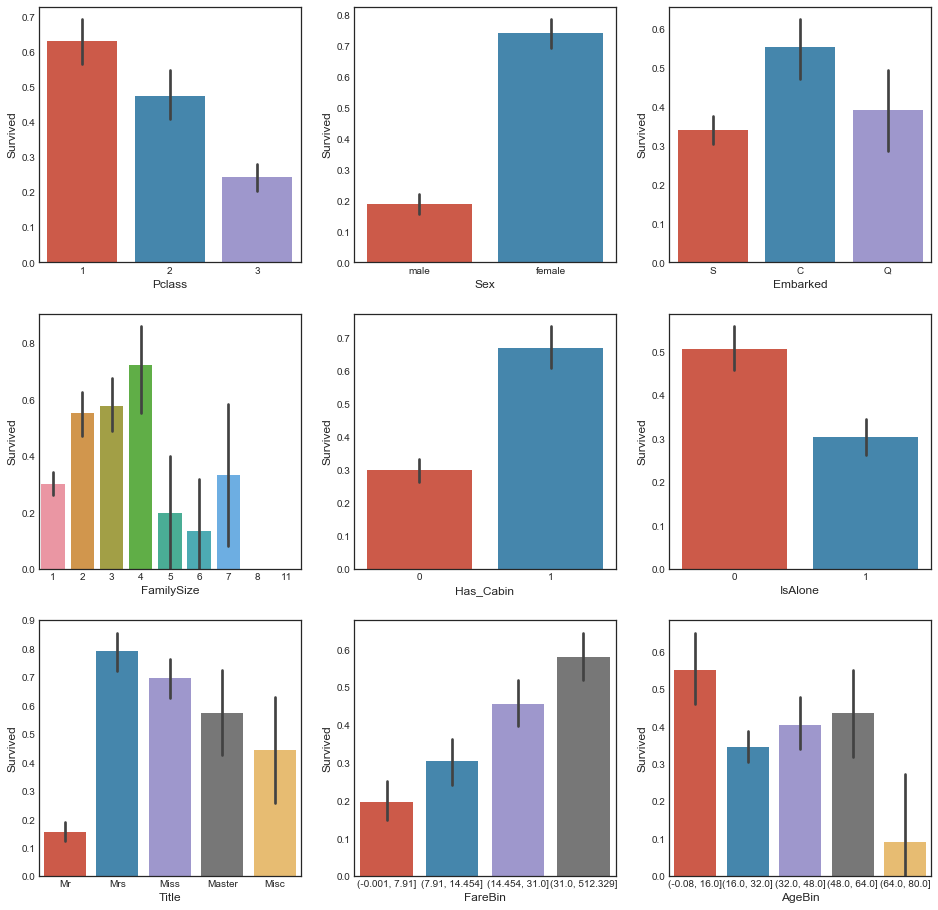

In [ ]:
#Simple Plotting
#categorical values
passenger_cnt  = train_data['Survived'].value_counts()

fig, saxis = plt.subplots(3, 3,figsize=(16,16))

plt.figure()
# sns.barplot(passenger_cnt.index, passenger_cnt.values, alpha=0.6, ax = saxis[0,0])
sns.barplot(x='Pclass', y='Survived', data=train_data, ax = saxis[0,0])
sns.barplot(x='Sex',y='Survived', data=train_data, ax = saxis[0,1])
sns.barplot(x='Embarked',y='Survived', data=train_data, ax = saxis[0,2])

sns.barplot(x='FamilySize', y='Survived', data=train_data, ax = saxis[1,0])
sns.barplot(x='Has_Cabin', y='Survived', data=train_data, ax = saxis[1,1])
sns.barplot(x='IsAlone', y='Survived', data=train_data, ax = saxis[1,2])

sns.barplot(x='Title', y='Survived', data=train_data, ax = saxis[2,0])
sns.barplot(x='FareBin', y='Survived', data=train_data, ax = saxis[2,1])
sns.barplot(x='AgeBin', y='Survived', data=train_data, ax = saxis[2,2])
plt.show()

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_encoder", OneHotEncoder(sparse=False), cat_attribs),
    ])

In [ ]:
# Data Preparation To Model Fit
target_col = ['Survived']
train_col = [col for col in train_data.columns if col != 'Survived']
print(train_col)
train_x, test_x, train_y, test_y = model_selection.train_test_split(train_data[train_col], train_data[target_col], random_state = 42)

['Pclass', 'Sex', 'Embarked', 'FamilySize', 'Has_Cabin', 'IsAlone', 'Title', 'FareBin', 'AgeBin']


In [ ]:
print("train_x Shape: {}".format(train_x.shape))
print("train_y Shape: {}".format(train_y.shape))
print("test_x Shape: {}".format(test_x.shape))
print("test_y Shape: {}".format(test_y.shape))

print("\n [train_x Sample] \n {}".format(train_x.head(2)))
print("\n [test_x Sample] \n {}".format(test_x.tail(2)))
print("\n [train_y Sample] \n {}".format(train_y.head(2)))
print("\n [test_y Sample] \n {}".format(test_y.tail(2)))

train_x Shape: (668, 9)
train_y Shape: (668, 1)
test_x Shape: (223, 9)
test_y Shape: (223, 1)

 [train_x Sample] 
      Pclass   Sex Embarked  FamilySize  Has_Cabin  IsAlone Title  \
298       1  male        S           1          1        1    Mr   
884       3  male        S           1          0        1    Mr   

            FareBin        AgeBin  
298  (14.454, 31.0]  (16.0, 32.0]  
884  (-0.001, 7.91]  (16.0, 32.0]  

 [test_x Sample] 
      Pclass     Sex Embarked  FamilySize  Has_Cabin  IsAlone Title  \
199       2  female        S           1          0        1  Miss   
424       3    male        S           3          0        0    Mr   

            FareBin        AgeBin  
199  (7.91, 14.454]  (16.0, 32.0]  
424  (14.454, 31.0]  (16.0, 32.0]  

 [train_y Sample] 
      Survived
298         1
884         0

 [test_y Sample] 
      Survived
199         0
424         0


In [ ]:
train_x = full_pipeline.fit_transform(train_x)
test_x = full_pipeline.fit_transform(test_x)

In [ ]:
print("model_train_x Shape: {}".format(train_x.shape))
print("model_test_x Shape: {}".format(test_x.shape))

# print("\n [model_train_x Sample] \n {}".format(model_train_x[:2,])
# print("\n [model_test_x Sample] \n {}".format(model_test_x[:2,])

model_train_x Shape: (668, 23)
model_test_x Shape: (223, 23)


In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size =.6, random_state=42 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_y

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_x, train_y, cv=cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    #save MLA predictions - see section 6 for usage
    alg.fit(train_x, train_y)
    MLA_predict[MLA_name] = alg.predict(train_x)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

ValueError: bad input shape (400, 2)

In [ ]:
# SVC Model Test
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(train_x, train_y)

# cross validation 10 회 시행
svm_scores = cross_val_score(svm_clf, train_x, train_y, scoring='accuracy', cv=10)
print("svm_scores.mean : ",svm_scores.mean())

svm_scores.mean :  0.8277236810599409


In [ ]:
print("Accuracy_score: ", metrics.accuracy_score(test_y, svm_clf.predict(test_x)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_y, svm_clf.predict(test_x)))
print("Classification_report Matrix: \n", metrics.classification_report(test_y, svm_clf.predict(test_x)))

Accuracy_score:  0.8340807174887892
Confusion Matrix: 
 [[119  15]
 [ 22  67]]
Classification_report Matrix: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

   micro avg       0.83      0.83      0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [ ]:
# Random Forest Test
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10).fit(train_x, train_y)
rfc_scores = cross_val_score(forest_clf, train_x, train_y,scoring='accuracy', cv=10)
print("rfc_scores.mean : ",rfc_scores.mean())

rfc_scores.mean :  0.8101245111341686


In [ ]:
print("Accuracy_score: ", metrics.accuracy_score(test_y, forest_clf.predict(test_x)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_y, forest_clf.predict(test_x)))
print("Classification_report Matrix: \n", metrics.classification_report(test_y, forest_clf.predict(test_x)))

Accuracy_score:  0.8026905829596412
Confusion Matrix: 
 [[106  28]
 [ 16  73]]
Classification_report Matrix: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       134
           1       0.72      0.82      0.77        89

   micro avg       0.80      0.80      0.80       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.80      0.80       223



In [ ]:
xgb_clf = XGBClassifier().fit(train_x, train_y)
xgb_scores = cross_val_score(xgb_clf, train_x, train_y, scoring='accuracy', cv=10)
print("xgb_scores.mean : ",xgb_scores.mean())

xgb_scores.mean :  0.8219091707239204


In [ ]:
print("Accuracy_score: ", metrics.accuracy_score(test_y, xgb_clf.predict(test_x)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_y, xgb_clf.predict(test_x)))
print("Classification_report Matrix: \n", metrics.classification_report(test_y, xgb_clf.predict(test_x)))

Accuracy_score:  0.8026905829596412
Confusion Matrix: 
 [[112  22]
 [ 22  67]]
Classification_report Matrix: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.75      0.75      0.75        89

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [ ]:
# lightGBM Test
lgbm_clf = lgb.LGBMClassifier().fit(train_x,train_y)
lgbm_scores = cross_val_score(lgbm_clf, train_x, train_y, cv=10)
print("lgbm_scores.mean : ",lgbm_scores.mean())

lgbm_scores.mean :  0.8161405539149174


In [ ]:
print("Accuracy_score: ", metrics.accuracy_score(test_y, lgbm_clf.predict(test_x)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_y, lgbm_clf.predict(test_x)))
print("Classification_report Matrix: \n", metrics.classification_report(test_y, lgbm_clf.predict(test_x)))

Accuracy_score:  0.8295964125560538
Confusion Matrix: 
 [[114  20]
 [ 18  71]]
Classification_report Matrix: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       134
           1       0.78      0.80      0.79        89

   micro avg       0.83      0.83      0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [ ]:
# Submission을 위한 최종 Validation Set(test_data) Data 전처리
vaild_x = full_pipeline.fit_transform(test_data[train_col])

In [ ]:
# submission을 위한 ID와 Prediction 데이터프레임 생성
submission = pd.DataFrame({"PassengerId": valid_data.PassengerId, "Survived": svm_clf.predict(vaild_x)})
# submission = pd.DataFrame(test_data.PassengerId, pred_result)
submission.to_csv("gender_submission_svm.csv",index=False)